
<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Exercises/E03_overfit_regularization.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Overfit and regularization exercises 

---
These are introductory exercises in Machine learning with focus in **overfitting and regularization** .

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. Tips data EDA (*)

In the whole exercise, we will work with the "tips" dataset from seaborn dataset. Start by loading dataset "tips" from the ```load_dataset``` method in seaborn module. The goal will be to use polynomial linear regression to predict tips. 

&nbsp; a) Start by doing some initial EDA such as info(), describe().

&nbsp; b) Use describe only on those columns that are relevant to get statistical information from. Plot the descriptive statistics for each numerical column, with a adequate plot type (e.g. barplot).

&nbsp; c) Based on the initial EDA, make some more plots on things you think could be worthwhile to investigate. 

&nbsp; d) Try discuss your findings with yourself/colleague and draw some conclusions if possible. Note that in reality, it is important to be able to communicate your findings so that other people in your team/customers/stakeholders etc. get an understanding of the data and realizes the importance of your role as a data scientist/analyst.

<details>

<summary>Answer</summary>


b)
<img src="../assets/df_describe.png" height="300"/>

c) Here are some example plots

<img src="../assets/tips_EDA.png" height="300"/>

<img src="../assets/tips_smoke_sex.png" width="500"/>

<img src="../assets/tips_bar_sex.png" width="300"/>


d) For example: 
- there are almost double amount of females represented in the dataset
- there are very few tables with 1 person eating, and they usually give very low tip
- female and male tip somewhat similar

</details>

---

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


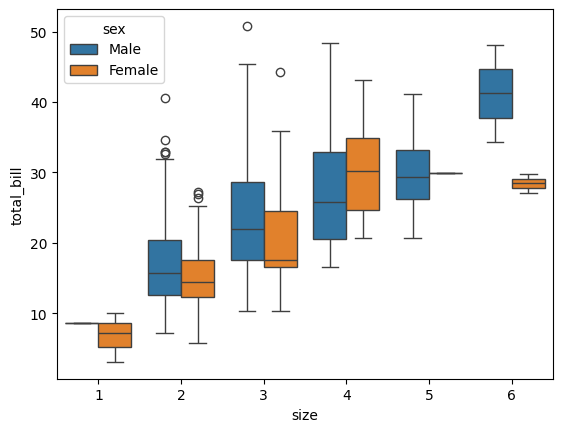

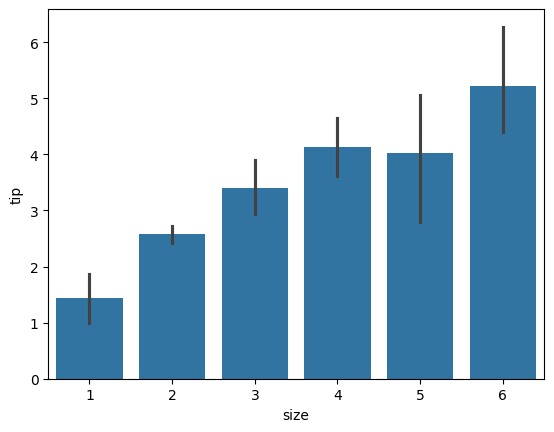

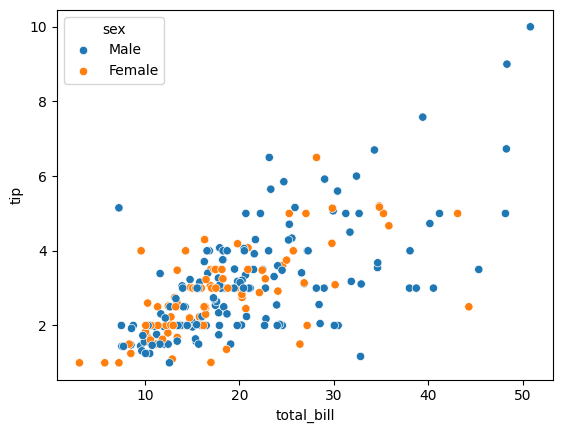

In [157]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = sns.load_dataset("tips")

#print(df.info(), df.describe())

print(df[["total_bill", "tip", "size"]].describe())


sns.boxplot(x="size", y="total_bill", data=df, hue= "sex")
plt.show()
sns.barplot(x="size", y="tip", data=df)
plt.show()
sns.scatterplot(x="total_bill", y="tip", data=df, hue="sex")
plt.show()



## 1. Train|test split (*)

Split the data into training part and testing part, using sklearn's train_test_split with test size of 0.3 and random_state 42.

In [158]:
from sklearn.model_selection import train_test_split

X = df[["total_bill", "size"]].values
y = df["tip"].values
df.dropna()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(170, 2) (74, 2) (170,) (74,)


---
## 2. Feature standardization (*)

We need to normalize the data and in this case will be using feature standardization. Implement this yourself following this formula:

$$X_{train}' = \frac{X_{train}-\mu_{train}}{\sigma_{train}}$$

$$X_{test}' = \frac{X_{test}-\mu_{train}}{\sigma_{train}}$$

, where $'$ denotes scaled, $\mu_{train}$ is the mean of the training data, $\sigma_{train}$ is the standard deviation of the training data. Note that it is very important that the mean and standard deviation is computed from the training data and not from testing data to avoid data leakage. Control the standard deviation and mean of $X_{train}'$ and $X_{test}'$. Is the results as you expect, why, why not?

<details>

<summary>Answer</summary>

scaled_X_train (total_bill, size) mean: [ 6.79195262e-17 -1.98534000e-16]

scaled_X_test (total_bill, size) mean: [-0.19137999 -0.04477934]

scaled_X_train (total_bill, size) std: [1. 1.]

scaled_X_test (total_bill, size) std: [0.92495673 1.06638889]

</details>

In [159]:
from sklearn.preprocessing import StandardScaler
import numpy as np


scaler = StandardScaler()
scale_X_train = scaler.fit_transform(X_train)
scale_X_test = scaler.transform(X_test)

print(f"Mean X_train Total_bill: {np.mean(scale_X_train[:, 0])}, Mean X_train Tip: {np.mean(scale_X_train[:, 1])}")
print(f"Std X_train Total_bill: {np.std(scale_X_train[:, 0])}, Std X_train Tip: {np.std(scale_X_train[:, 1])}")

print(f"Mean X_test Total_bill: {np.mean(scale_X_test[:, 0])}, Mean X_test Tip: {np.mean(scale_X_test[:, 1])}")
print(f"Std X_test Total_bill: {np.std(scale_X_test[:, 0])}, Std X_test Tip: {np.std(scale_X_test[:, 1])}")


Mean X_train Total_bill: -7.209918936389252e-16, Mean X_train Tip: -1.4628821030355004e-16
Std X_train Total_bill: 1.0, Std X_train Tip: 0.9999999999999998
Mean X_test Total_bill: -0.1919453710165526, Mean X_test Tip: -0.04491163109964236
Std X_test Total_bill: 0.9213997637553282, Std X_test Tip: 1.06228803396915


---
## 3. Polynomial features (*)

We want to investigate ```Polynomialfeatures``` from scikit-klearn in this task. Start by instantiating an object of type ```PolynomialFeatures``` with degree 2. Now do the following: 

- use the method fit on $X_{train}'$
- transform $X_{train}'$
- transform $X_{test}'$

Compare this transformed $X_{test}'$ with $X_{test}''$ where $X_{test}''$ comes from fitting the polynomial features to $X_{test}'$ and transforming $X_{test}'$. You can check directly by using ```==``` and then sum it up. If the value is same as the length, then you know that they are the same, as a boolean True evaluates to 1. 


In [160]:
from sklearn.preprocessing import PolynomialFeatures

model_poly = PolynomialFeatures(degree=2) # create the model, instantiate the model with degree 2
X_train_poly = model_poly.fit_transform(scale_X_train) # fit the model
X_test_poly = model_poly.transform(scale_X_test) # transform the testdata

print(X_train_poly.shape, X_test_poly.shape) # check the shape of the transformed data, returns tuple of rows(n_samples), columns(n_features) 


# jämför X_train och X_train_poly
comparison = scale_X_train == X_train_poly[:, :2] # [select all rows : , : select all columns]  
print(f"Number of matching elements between X_train and X_train_poly:", comparison.sum())

# A result of 0 matching elements suggests that there are no exact matches between the original features and their corresponding positions in the polynomial-transformed dataset, which is entirely expected when you apply polynomial transformations. This is because the transformation generates new features that differ from the original ones.

(170, 6) (74, 6)
Number of matching elements between X_train and X_train_poly: 0


---
## 4. Polynomial regression  (*)

We will now investigate the training loss and testing loss for different degrees of polynomial. Loop through degrees 1 to 4 (inclusive) and:
- instantiate an object of PolynomialFeatures with that degree
- fit and transform $X_{train}'$ and $X_{test}$ to create polynomial features
- perform linear regression on these polynomial features (polynomial regression)
- predict on both the training and testing data to record RMSE for training and testing for each iteration of the loop

Now plot the results in the same figure. Do you notice anything special? 

<details>

<summary>Answer</summary>

<img src="../assets/E3_overfitting.png" height="300"/>

</details>

Degree: 1, X_train_poly shape: (170, 3), X_test_poly shape: (74, 3), RMSE: 1.05, RMSE_test: 0.92
Degree: 2, X_train_poly shape: (170, 6), X_test_poly shape: (74, 6), RMSE: 1.05, RMSE_test: 0.95
Degree: 3, X_train_poly shape: (170, 10), X_test_poly shape: (74, 10), RMSE: 0.98, RMSE_test: 1.05
Degree: 4, X_train_poly shape: (170, 15), X_test_poly shape: (74, 15), RMSE: 0.91, RMSE_test: 2.70


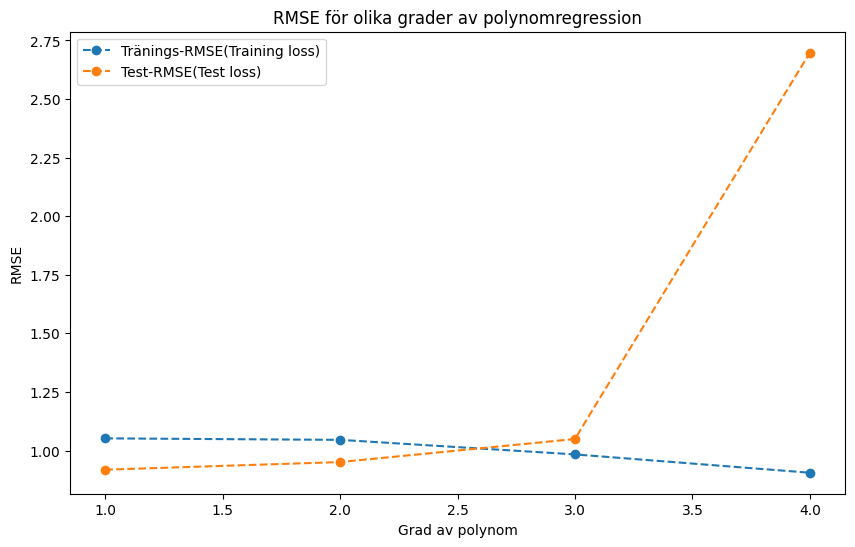

In [161]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

RMSE_train = []
RMSE_test = []

for i in range(1,5):
    model_poly = PolynomialFeatures(degree=i) # create the model, instantiate the model with degree 1-5 with loop
    X_train_poly = model_poly.fit_transform(scale_X_train) # fit the model
    X_test_poly = model_poly.transform(scale_X_train) # transform the traindata
    X_test_poly = model_poly.transform(scale_X_test) # transform the testdata
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred_train = model.predict(X_train_poly)
    y_pred_test = model.predict(X_test_poly)
    
    RMSE_train.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    RMSE_test.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))
    print(f"Degree: {i}, X_train_poly shape: {X_train_poly.shape}, X_test_poly shape: {X_test_poly.shape}, RMSE: {RMSE_train[i-1]:.2f}, RMSE_test: {RMSE_test[i-1]:.2f}")


# plot the model
plt.figure(figsize=(10, 6))
plt.plot(range(1, 5), RMSE_train, label='Tränings-RMSE' "(Training loss)", linestyle="--",marker='o')
plt.plot(range(1, 5), RMSE_test, label='Test-RMSE'"(Test loss)", linestyle ="--",marker='o')
plt.xlabel('Grad av polynom')
plt.ylabel('RMSE')
plt.title('RMSE för olika grader av polynomregression')
plt.legend()
plt.show()

---
## 5. Regularization methods (*)

Now we will try the regularization methods: ridge regression, lasso regression and elasticnet regression. In the following tasks, use degree = 4. 

&nbsp; a) Use ridge regression with cross-validation and test out different alpha-values. I used $\alpha=[0.01, 0.1, 0.5, 1, 5, 10]$ in the cross-validation. 
- Check which alpha, that the cross-validation chose as the best one. 
- Check the weights.
- Check MAE, MSE, RMSE.

&nbsp; b) Use lasso regression with cross-validation and choose number of alphas to 100. If you get a warning that the algorithm is not converging, increase the max iterations, I chose 10000 iterations. 
- Check which alpha, that the cross-validation chose as the best one. 
- Check the weights.
- Check MAE, MSE, RMSE.

&nbsp; c) Use elasticnet regression with cross-validation and choose number of alphas to 100. If you get a warning that the algorithm is not converging, increase the max iterations, I chose 10000 iterations. Choose a set of $\ell_1$ ratios for it to try out. I chose $\ell_1 = [.001, .01, .05, .1, .5, .9, .95, 1]$
- Check which alpha, that the cross-validation chose as the best one. 
- Check the weights.
- Check MAE, MSE, RMSE.

<details>

<summary>Answer</summary>

a) 

Chosen alpha from cross-validation 5.0

Weights: [ 0.          0.91469637  0.23893931 -0.67583593  0.20550801 -0.01369317
 -0.26007685  0.31867863 -0.03429744 -0.12484035  0.16000319 -0.18105113
  0.24878399 -0.12692847  0.05002613]

Mean absolute error: 0.831

Mean squared error: 2.208

Root mean squared error: 1.486

b) 

Chosen alpha from cross-validation 0.208

Weights: [ 0.          0.23469707  0.         -0.         -0.          0.
  0.08814685  0.09735986  0.          0.03219702  0.          0.
  0.         -0.          0.        ]

Mean absolute error: 0.823

Mean squared error: 1.345

Root mean squared error: 1.160

c)

Chosen alpha from cross-validation 0.107

Mean absolute error: 0.761

Root mean squared error: 1.139

L1_ratio: 0.9

Weights: [ 0.          0.23469707  0.         -0.         -0.          0.
  0.08814685  0.09735986  0.          0.03219702  0.          0.
  0.         -0.          0.        ]


</details>

In [162]:
from sklearn.linear_model import RidgeCV

scaler = StandardScaler() # Skapar en instans av StandardScaler-klassen
scale_X_train = scaler.fit_transform(X_train) # Anpassar/Skalar träningsdatan
scale_X_test = scaler.transform(X_test) # Anpassar/Skalar testdatan


poly = PolynomialFeatures(degree=4) # Skapar en instans av PolynomialFeatures-klassen och väljer grad 4
X_train_poly = poly.fit_transform(scale_X_train) # Transformerar träningsdatan till polynomisk form
X_test_poly = poly.transform(scale_X_test) # Transformerar testdatan till polynomisk form


# Skapar och tränar en Ridge Regression-modell med korsvalidering för att hitta optimal alpha (regularisering)
model_ridge = RidgeCV(alphas=[0.01,0.1,0.5,1,5,10]) # Definerar modellen och vilka alphas som ska testas
model_ridge.fit(X_train_poly,y_train) # Tränar modellen

best_alpha = model_ridge.alpha_

MAE = np.mean(np.abs(model_ridge.predict(X_test_poly) - y_test)) # Mean Absolute Error
MSE = np.mean((model_ridge.predict(X_test_poly) - y_test)**2) # Mean Squared Error
RMSE = np.sqrt(MSE) # Root Mean Squared Error


ridge_weights = model_ridge.coef_ # Kollar tränade "vikterna" (coefficients)
print(f"Best alpha: {best_alpha}")
print(f" Ridge wieghts {ridge_weights}")
print(f"MAE: {MAE:.2f}, MSE: {MSE:.2f}, RMSE: {RMSE:.2f}")

Best alpha: 5.0
 Ridge wieghts [ 0.          0.91433889  0.23803646 -0.67393371  0.20651601 -0.01502712
 -0.25974303  0.31834213 -0.03541485 -0.12391278  0.1589648  -0.18093215
  0.24867839 -0.12671385  0.04977343]
MAE: 0.83, MSE: 2.22, RMSE: 1.49


In [163]:
from sklearn.linear_model import LassoCV

model_lasso = LassoCV(eps=0.001, n_alphas=100, max_iter=100000, cv=5) # Definerar modellen och dess hyperparametrar
model_lasso.fit(X_train_poly,y_train) # Tränar modellen

y_pred = model_lasso.predict(X_test_poly) # Gör förutsägelser på testdatan

MAE = np.mean(np.abs(y_pred - y_test)) # Mean Absolute Error
MSE = np.mean((y_pred - y_test)**2) # Mean Squared Error
RMSE = np.sqrt(MSE) # Root Mean Squared Error

best_alpha = model_lasso.alpha_
lasso_weights = model_lasso.coef_ # Kollar tränade "vikterna" (coefficients)
print(f"Best alpha for Lasso: {best_alpha:.4f}")
print(f"Lasso weights: {lasso_weights}")
print(f"MAE: {MAE:.2f}, MSE: {MSE:.2f}, RMSE: {RMSE:.2f}")

Best alpha for Lasso: 0.2102
Lasso weights: [ 0.          0.2295082   0.         -0.         -0.          0.
  0.08795486  0.09662404  0.          0.03202518  0.          0.
  0.         -0.          0.        ]
MAE: 0.82, MSE: 1.35, RMSE: 1.16


In [164]:
from sklearn.linear_model import ElasticNetCV

model_elastic = ElasticNetCV(l1_ratio=[.001, .01, .05, .1, .5, .9, .95, 1], eps=0.001, n_alphas=100, max_iter=100000, cv=5) # Definerar modellen och dess hyperparametrar
model_elastic.fit(X_train_poly, y_train) # Tränar modellen
y_pred = model_elastic.predict(X_test_poly) # Gör förutsägelser på testdatan

MAE = np.mean(np.abs(y_pred - y_test)) # Mean Absolute Error
MSE = np.mean((y_pred - y_test)**2) # Mean Squared Error
RMSE = np.sqrt(MSE) # Root Mean Squared Error


best_l1_ratio = model_elastic.l1_ratio_
best_alpha = model_elastic.alpha_
elastic_weights = model_elastic.coef_ # Kollar tränade "vikterna" (coefficients)

print(f"Best alpha: {best_alpha:.4f}")
print(f"Best l1 ratio: {best_l1_ratio}")
print(f"Elastic weights: {elastic_weights}")
print(f"MAE: {MAE:.2f}, MSE: {MSE:.2f}, RMSE: {RMSE:.2f}")

Best alpha: 0.1084
Best l1 ratio: 0.9
Elastic weights: [ 0.          0.51628455  0.09794359 -0.2112758   0.          0.
  0.          0.11342458  0.          0.01797787  0.03695473  0.
  0.          0.          0.        ]
MAE: 0.76, MSE: 1.30, RMSE: 1.14


---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---